**Import Library**

In [1]:
#Data analysis   
import pandas as pd 
import numpy as np
import csv
import nltk
import tensorflow as tf

#Data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
from matplotlib import ticker
%config InlineBackend.figure_format = 'svg' 

In [2]:
import pandas as pd

df = pd.read_csv("SINGGALANG.tsv", header = None, delimiter="\t", quoting=csv.QUOTE_NONE, encoding='utf-8')
print(df)

                    0             1
0                  Ia             O
1            menjabat             O
2             sebagai             O
3            Presiden             O
4              ketiga             O
...               ...           ...
1478263            di             O
1478264      kalangan             O
1478265       pelajar             O
1478266  Muhammadiyah  Organisation
1478267             .             O

[1478268 rows x 2 columns]


In [3]:
df.isna()

,0,1
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1478263,False,False
1478264,False,False
1478265,False,False
1478266,False,False


In [4]:
df.isna().sum()

0    20
1     0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

0    0
1    0
dtype: int64

In [6]:
list_kalimat = []
nomor_kalimat = 1

#Open file in read mode
with open('SINGGALANG.tsv', encoding='UTF-8') as read_obj:
    # Pass the file object to reader() to get the reader object
    csv_reader = csv.reader(read_obj, delimiter='\t', quotechar=None) #https://www.petanikode.com/python-csv/ 
#https://docs.python.org/id/3.9/library/csv.html
#Menginstruksikan reader untuk tidak melakukan pemrosesan khusus terhadap karakter kutipan
    #Iterate over each row in the csv using reader object
    for row in csv_reader:
        #Row variable is a list that represents a row in csv
        if len(row) == 0:
            nomor_kalimat += 1 
        else:
            tmp_row= row
            tmp_row.append(nomor_kalimat)
            list_kalimat.append(tmp_row)

dataset = pd.DataFrame(list_kalimat, columns=['token', 'entitas bernama', 'kalimat'])

In [7]:
dataset.head(10)

,token,entitas bernama,kalimat
0,Ia,O,1
1,menjabat,O,1
2,sebagai,O,1
3,Presiden,O,1
4,ketiga,O,1
5,Mesir,Place,1
6,pada,O,1
7,periode,O,1
8,15,O,1
9,Oktober,O,1


In [8]:
dataset.tail()

,token,entitas bernama,kalimat
1478263,di,O,48957
1478264,kalangan,O,48957
1478265,pelajar,O,48957
1478266,Muhammadiyah,Organisation,48957
1478267,.,O,48957


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1478268 entries, 0 to 1478267
Data columns (total 3 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   token            1478268 non-null  object
 1   entitas bernama  1478268 non-null  object
 2   kalimat          1478268 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 33.8+ MB


**2. Exploration Data Analyisis**

In [10]:
#Kelas untuk mengambil kalimat dari dataset
class getsentence(object): #deklarasikan class dengan nama getsentence
    
    def __init__(self, data): #Deklarasikan “variabel” menggunakan kata “self” yang menunjukkan bahwa “variabel” merupakan milik dari class “getsentence”
      self.n_sent = 1.0
      self.dataset = dataset
      self.empty = False 
      
      #Lambda adalah fungsi untuk mengembalikan nilai 
      agg_func = lambda s: [(t, e) for t, e in zip(s["token"].values.tolist(),
                                                 s["entitas bernama"].values.tolist())]                                           
      self.grouped = self.dataset.groupby("kalimat").apply(agg_func)
      self.sentences = [s for s in self.grouped]

In [11]:
getter = getsentence(dataset)
kalimat = getter.sentences

#Tampilan kalimat adalah sebagai berikut 
print(kalimat[0]) #Untuk kalimat pertama

[('Ia', 'O'), ('menjabat', 'O'), ('sebagai', 'O'), ('Presiden', 'O'), ('ketiga', 'O'), ('Mesir', 'Place'), ('pada', 'O'), ('periode', 'O'), ('15', 'O'), ('Oktober', 'O'), ('1970', 'O'), ('hingga', 'O'), ('terbunuhnya', 'O'), ('pada', 'O'), ('6', 'O'), ('Oktober', 'O'), ('1981', 'O'), ('.', 'O')]


In [12]:
longest_sen = max(kalimat, key=len)
longest_sen_len = len(longest_sen)

In [13]:
print (longest_sen_len)

490


In [14]:
print (longest_sen)

[('Sejarah', 'O'), ('Asal', 'O'), ('Usul', 'O'), ('Desa', 'O'), ('ArjawinangunDiceritakan', 'O'), ('dalam', 'O'), ('alam', 'O'), ('pengembaraannya', 'O'), ('untuk', 'O'), ('mencari', 'O'), ('dan', 'O'), ('memperdalam', 'O'), ('agama', 'O'), ('islam', 'O'), (',', 'O'), ('dua', 'O'), ('orang', 'O'), ('Pajajaran', 'Place'), ('Raden', 'O'), ('Walangsungsng', 'O'), ('dan', 'O'), ('Adiknya', 'O'), ('Nyi', 'O'), ('Rarasantang', 'O'), (',', 'O'), ('sampai', 'O'), ('ke', 'O'), ('Mesir', 'Place'), ('menunaikan', 'O'), ('Ibadah', 'O'), ('Haji', 'O'), (',', 'O'), ('Raden', 'O'), ('Walangsungsang', 'O'), ('pulang', 'O'), ('ke', 'O'), ('Cirebon', 'Place'), ('dengan', 'O'), ('sebutan', 'O'), ('Haji', 'O'), ('Abdullah', 'Person'), ('Iman', 'O'), (',', 'O'), ('sedangkan', 'O'), ('adiknyaNyi', 'O'), ('Rarasantang', 'O'), ('tetap', 'O'), ('berada', 'O'), ('di', 'O'), ('Mesir', 'Place'), ('karena', 'O'), ('telah', 'O'), ('bersuami', 'O'), ('dengan', 'O'), ('Syarif', 'O'), ('Abdullah', 'Person'), ('seorang

In [15]:
shortest_sen = min(kalimat, key=len)
shortest_sen_len = len(shortest_sen)

In [16]:
print (shortest_sen_len)

2


In [17]:
print (shortest_sen)

[('III/S', 'O'), ('.', 'O')]


In [18]:
print("Jumlah kalimat: ", len(dataset.groupby(['kalimat'])))
words = list(set(dataset["token"].values))
n_words = len(words)
print("Jumlah kata unik : ", n_words)
tags = list(set(dataset["entitas bernama"].values))
print("Entitas bernama:", tags)
n_tags = len(tags)
print("Jumlah entitas bernama: ", n_tags)

Jumlah kalimat:  48957
Jumlah kata unik :  100839
Entitas bernama: ['Organisation', 'Person', 'Place', 'O']
Jumlah entitas bernama:  4


In [19]:
#Words tagged as Place
dataset.loc[dataset['entitas bernama'] == 'Place', 'token'].head()

5        Mesir
29       Mesir
47       Mesir
68    Kerajaan
70       Kairo
Name: token, dtype: object

In [20]:
dataset.iloc[220085] 

token              Propinsi
entitas bernama           O
kalimat                7303
Name: 220085, dtype: object

In [21]:
#Words tagged as Person
dataset.loc[dataset['entitas bernama'] == 'Person', 'token'].head()

38     Sadat
100    Anwar
101    Sadat
105    Hafez
107    Assad
Name: token, dtype: object

In [22]:
#Words tagged as Organization
dataset.loc[dataset['entitas bernama'] == 'Organisation', 'token'].head()

568    Universitas
569      Indonesia
711     Independen
778    Universitas
779         Gadjah
Name: token, dtype: object

In [23]:
#Words tagged as O
dataset.loc[dataset['entitas bernama'] == 'O', 'token'].head()

0          Ia
1    menjabat
2     sebagai
3    Presiden
4      ketiga
Name: token, dtype: object

In [24]:
dataframe = dataset.groupby("entitas bernama" )
dataframe["entitas bernama"].count()

entitas bernama
O               1340023
Organisation      14770
Person            41297
Place             82178
Name: entitas bernama, dtype: int64

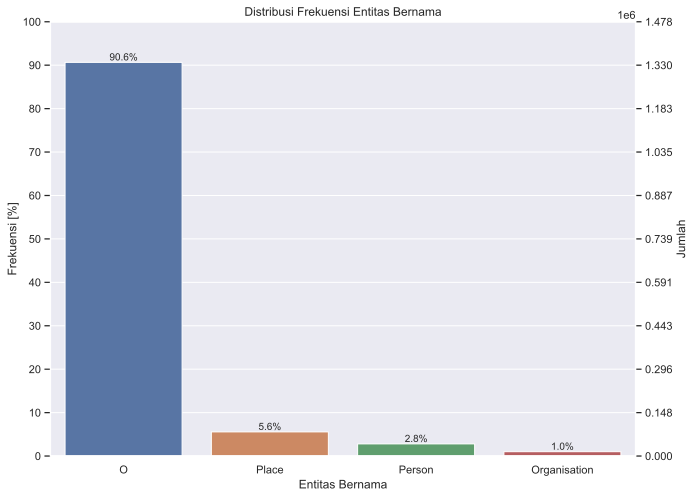

In [25]:
ncount = len(dataset)

plt.figure(figsize=(10.5, 8))
ax = sns.countplot(x = "entitas bernama", data = dataset)
plt.title('Distribusi Frekuensi Entitas Bernama')
plt.xlabel('Entitas Bernama')

# Buat twin axis
ax2 = ax.twinx()

# Tukar sehingga count axis di kanan, frequency di kiri
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Tukar juga label
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Jumlah')
ax2.set_ylabel('Frekuensi [%]')

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha = 'center', va = 'bottom') # atur alignment teks

# Gunakan LinearLocator untuk memastikan jumlah tick yang benar
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Perbaiki rentang frekuensi menjadi 0-100
ax2.set_ylim(0, 100)
ax.set_ylim(0, ncount)

# Gunakan MultipleLocator untuk memastikan spaci antar-tick yaitu 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Atur sehingga grid pada ax2 off, supaya gridlines tidak ditampilkan
# pada bagian atas bar
ax2.grid(None)

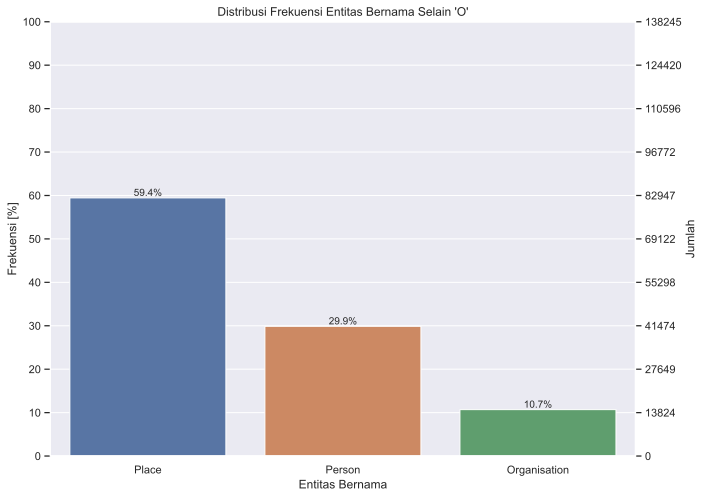

In [26]:
ncount = len(dataset.loc[dataset['entitas bernama'] != 'O'])

plt.figure(figsize=(10.5, 8))
ax = sns.countplot(x = "entitas bernama", data = dataset.loc[dataset['entitas bernama'] != 'O'])
plt.title('Distribusi Frekuensi Entitas Bernama Selain \'O\'')
plt.xlabel('Entitas Bernama')

# Buat twin axis
ax2 = ax.twinx()

# Tukar sehingga count axis di kanan, frequency di kiri
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

# Tukar juga label
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax.set_ylabel('Jumlah')
ax2.set_ylabel('Frekuensi [%]')

for p in ax.patches:
    x = p.get_bbox().get_points()[:,0]
    y = p.get_bbox().get_points()[1, 1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha = 'center', va = 'bottom') # atur alignment teks

# Gunakan LinearLocator untuk memastikan jumlah tick yang benar
ax.yaxis.set_major_locator(ticker.LinearLocator(11))

# Perbaiki rentang frekuensi menjadi 0-100
ax2.set_ylim(0, 100)
ax.set_ylim(0, ncount)

# Gunakan MultipleLocator untuk memastikan spaci antar-tick yaitu 10
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

# Atur sehingga grid pada ax2 off, supaya gridlines tidak ditampilkan
# pada bagian atas bar
ax2.grid(None)

In [27]:
# Menampilkan 20 token pertama yang paling banyak muncul 
dataset['token'].value_counts()[:20]

,          88144
.          49109
dan        37283
di         33701
yang       29353
-LRB-      19843
-RRB-      19736
''         15906
``         15232
dengan     15231
pada       15021
dari       14900
tahun      13079
sebagai     9038
ini         8371
untuk       8297
dalam       8266
adalah      7950
menjadi     7414
oleh        5974
Name: token, dtype: int64

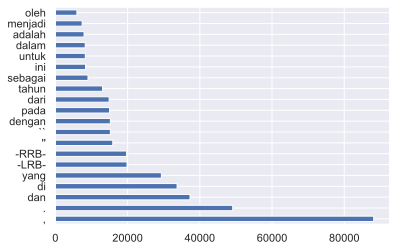

In [28]:
# Visualisasi data 20 token yang paling banyak muncul
dataset['token'].value_counts()[:20].plot(kind='barh')